# Przepływ optyczny

# Implementacja metody blokowej

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def read_and_convert(filename):
    img = cv2.imread(filename)
    dim = (img.shape[1] // 2, img.shape[0] // 2)
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
    return gray


In [3]:
def show_image(I):
    plt.imshow(I, 'gray')

In [4]:
I = read_and_convert('resources/I.jpg')
J = read_and_convert('resources/J.jpg')

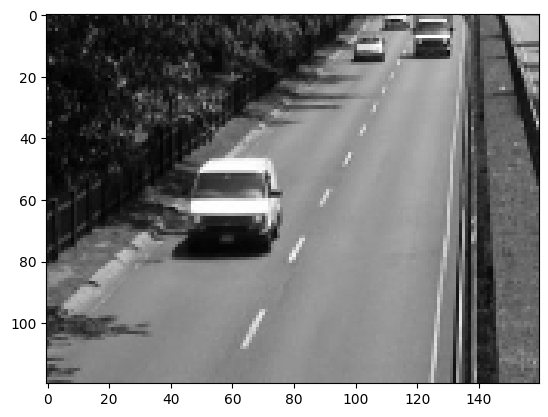

In [5]:
show_image(I)

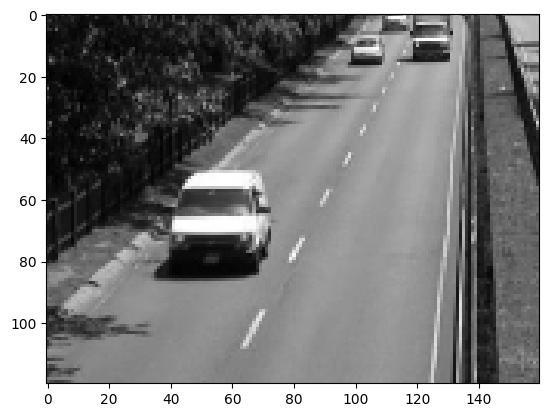

In [118]:
show_image(J)

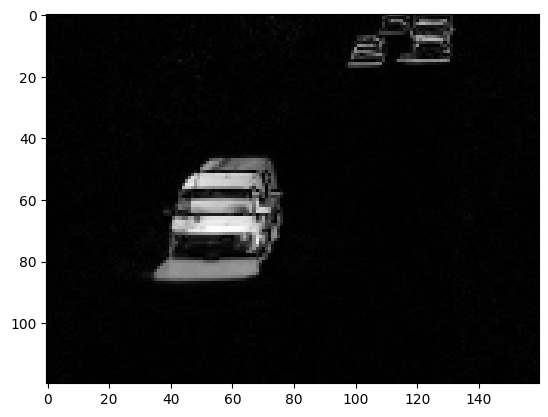

In [119]:
show_image(cv2.absdiff(I, J))

### Metoda blokowa

In [6]:
def optical_flow(I, J, W2, dX, dY):
    u = np.zeros((I.shape[0], I.shape[1]))
    v = np.zeros((I.shape[0], I.shape[1]))
    for j in range(W2, I.shape[0] - W2):
        for i in range(W2, I.shape[1] - W2):
            IO = np.float32(I[j-W2:j+W2+1,i-W2:i+W2+1])
            local_min = float('inf')
            coordinates = (j, i)
            for l in range(j-dY, j+dY+1):
                for k in range(i-dX, i+dX+1):
                    if not(k >= W2 and k < I.shape[1] - W2 and l >= W2 and l < I.shape[0] - W2):
                        continue
                    JO = np.float32(J[l-W2:l+W2+1,k-W2:k+W2+1])
                    diff = np.sum(np.sqrt((np.square(JO-IO))))
                    if diff < local_min:
                        local_min = diff
                        coordinates = (l, k)
            u[j, i] = coordinates[0] - j
            v[j, i] = coordinates[1] - i
    return u, v

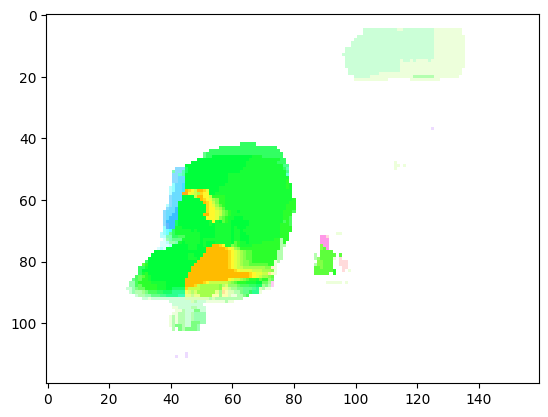

In [7]:
hsv = np.ones((I.shape[0], I.shape[1], 3), dtype=np.uint8)
u, v = optical_flow(I, J, 5, 5, 5)
for i in range(I.shape[0]):
    mag, angle = cv2.cartToPolar(v, u)
    hsv[:, :, 0] = (angle * 90 / np.pi)
    hsv[:, :, 1] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
    hsv[:, :, 2] = 255
rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
plt.imshow(rgb)

Obrazy cm1 i cm2 pomniejszone dwukrotnie

In [122]:
def read_and_convert(filename):
    img = cv2.imread(filename)
    dim = (img.shape[1] // 2, img.shape[0] // 2)
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
    return gray


In [123]:
cm1 = read_and_convert('resources/cm1.png')
cm2 = read_and_convert('resources/cm2.png')

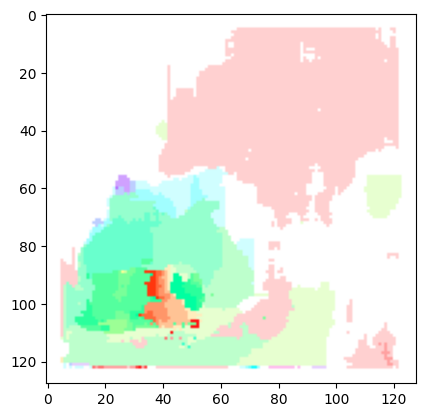

In [124]:
hsv = np.ones((cm1.shape[0], cm2.shape[1], 3), dtype=np.uint8)
u, v = optical_flow(cm1, cm2, 5, 5, 5)
for i in range(cm1.shape[0]):
    mag, angle = cv2.cartToPolar(v, u)
    hsv[:, :, 0] = (angle * 90 / np.pi)
    hsv[:, :, 1] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
    hsv[:, :, 2] = 255
rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
plt.imshow(rgb)

Wieloskalowa wersja metody blokowej

In [102]:
def optical_flow(I, J, W2=3, dX=3, dY=3):
    u = np.zeros((I.shape[0], I.shape[1]), dtype=np.int16)
    v = np.zeros((I.shape[0], I.shape[1]), dtype=np.int16)
    for j in range(W2, I.shape[0] - W2):
        for i in range(W2, I.shape[1] - W2):
            IO = np.float32(I[j-W2:j+W2+1,i-W2:i+W2+1])
            local_min = float('inf')
            coordinates = (j, i)
            for l in range(j-dY, j+dY+1):
                for k in range(i-dX, i+dX+1):
                    if not(k >= W2 and k < I.shape[1] - W2 and l >= W2 and l < I.shape[0] - W2):
                        continue
                    JO = np.float32(J[l-W2:l+W2+1,k-W2:k+W2+1])
                    diff = np.sum(np.sqrt((np.square(JO-IO))))
                    if diff < local_min:
                        local_min = diff
                        coordinates = (l, k)
            u[j, i] = coordinates[0] - j
            v[j, i] = coordinates[1] - i
    return u, v

In [105]:
def vis_flow(u, v, YX):
    hsv = np.ones((YX[0], YX[1], 3), dtype=np.uint8)
    mag, angle = cv2.cartToPolar(v.astype(np.float32), u.astype(np.float32))
    hsv[:, :, 0] = (angle * 90 / np.pi)
    hsv[:, :, 1] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
    hsv[:, :, 2] = 255
    rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
    plt.imshow(rgb)
    plt.show()

TEST

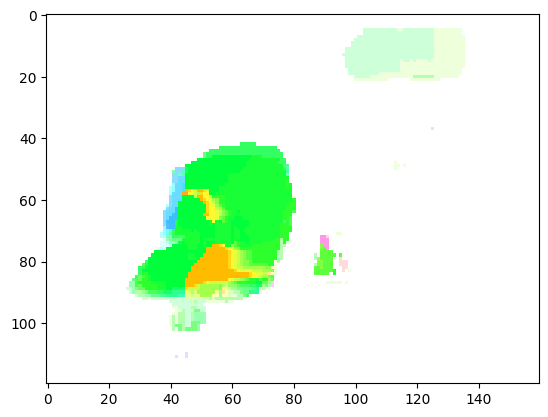

In [106]:
I = read_and_convert('resources/I.jpg')
J = read_and_convert('resources/J.jpg')
dim = (I.shape[1] // 2, I.shape[0] // 2)
I = cv2.resize(I, dim, interpolation = cv2.INTER_AREA)
J = cv2.resize(J, dim, interpolation = cv2.INTER_AREA)
u, v = optical_flow(I, J, 5, 5, 5)
vis_flow(u, v, I.shape)

Funkcja do generowania piramidy obrazów

In [107]:
def pyramid(im, max_scale):
    images=[im]
    for k in range(1, max_scale):
        images.append(cv2.resize(images[k-1], (0,0), fx=0.5, fy=0.5))
    return images

In [108]:
def read_and_convert(filename):
    img = cv2.imread(filename)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return gray

In [119]:
def multiscale_of(I, J, no_scales=2, W2=3, dX=3, dY=3):
    IP = pyramid(I, no_scales)
    JP = pyramid(J, no_scales)
    u_finish = np.zeros((I.shape[0], I.shape[1], no_scales), dtype=np.int16)
    v_finish = np.zeros((I.shape[0], I.shape[1], no_scales), dtype=np.int16)
    I = IP[-1]

    for img_index in range(1, len(IP)+1):
        u, v = optical_flow(I, JP[-img_index], W2, dX, dY)
        vis_flow(u, v, JP[-img_index].shape)
        if (no_scales != img_index):
            u = cv2.resize(u * 2 * (no_scales-img_index), (0, 0), fx=2 * (no_scales-img_index), fy=2 * (no_scales-img_index), interpolation=cv2.INTER_NEAREST)
            v = cv2.resize(v * 4 * (no_scales-img_index), (0, 0), fx=2 * (no_scales-img_index), fy=2 * (no_scales-img_index), interpolation=cv2.INTER_NEAREST)
        
        u_finish[:, :, img_index-1] = u
        v_finish[:, :, img_index-1] = v
        I_new = IP[-img_index].copy()
        for j in range(IP[-img_index].shape[0]):
            for i in range(IP[-img_index].shape[1]):
                I_new[j, i] = IP[-img_index][j+u[j,i], i+v[j,i]] if (j+u[j,i] < I.shape[0] and i+v[j,i] < I.shape[1]) else I_new[j, i]
        I = cv2.resize(I_new, (0, 0), fx=2, fy=2, interpolation=cv2.INTER_NEAREST)
    return np.sum(u_finish, axis=2), np.sum(v_finish, axis=2)

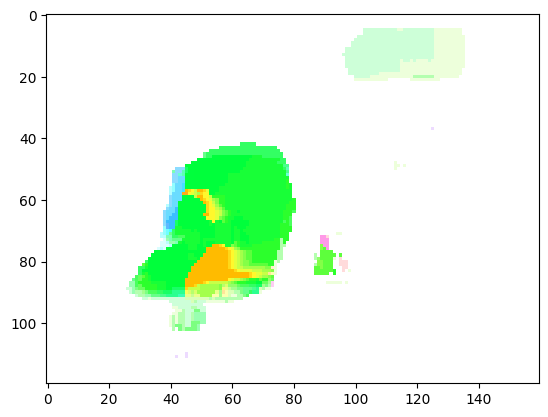

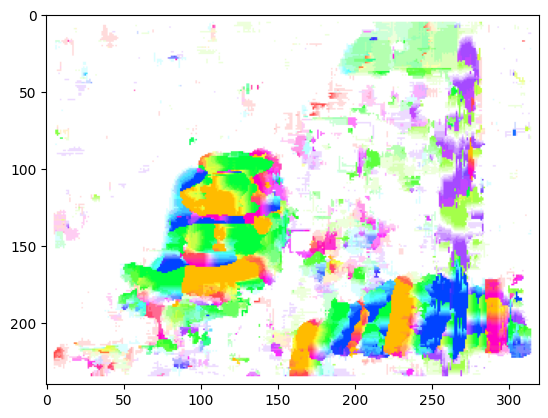

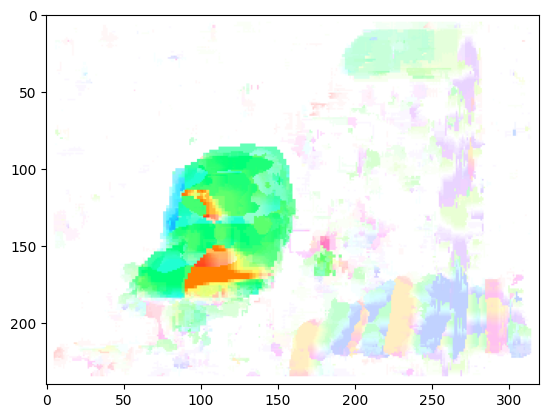

In [120]:
I = read_and_convert('resources/I.jpg')
J = read_and_convert('resources/J.jpg')
u, v = multiscale_of(I, J, 2, 5, 5, 5)
vis_flow(u, v, I.shape)

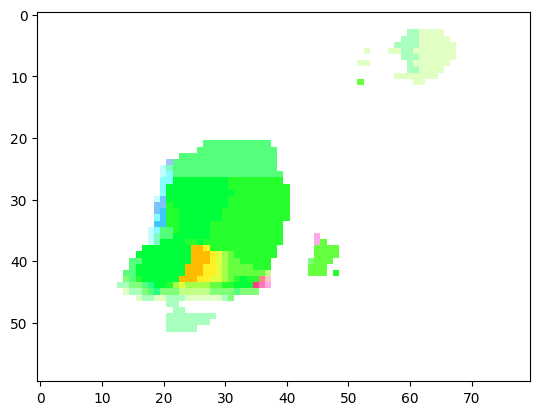

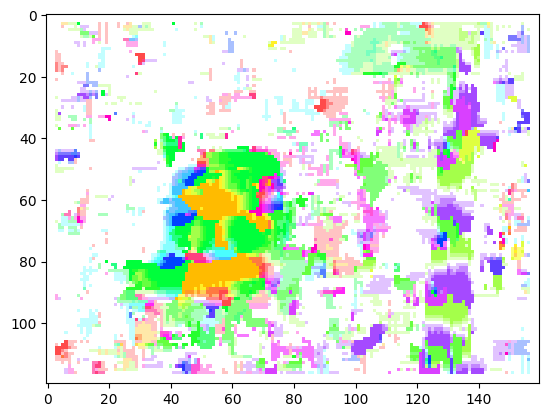

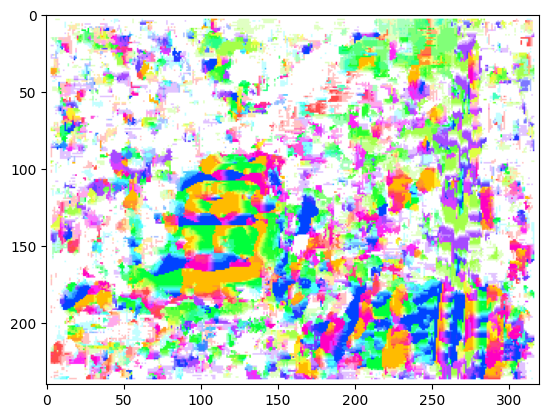

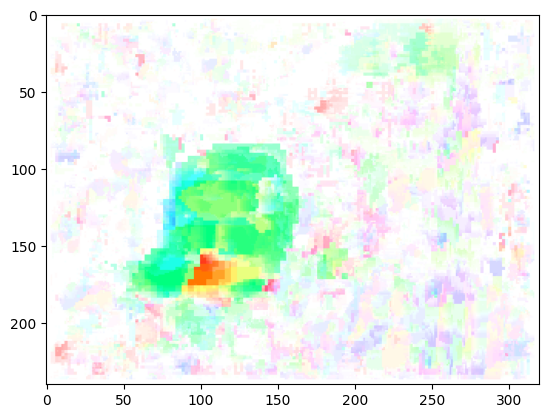

In [121]:
I = read_and_convert('resources/I.jpg')
J = read_and_convert('resources/J.jpg')
u, v = multiscale_of(I, J, 3, 3, 3, 3)
vis_flow(u, v, I.shape)

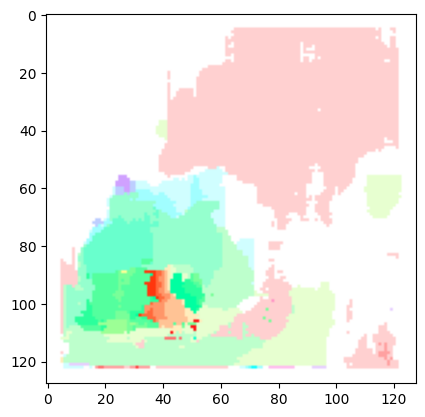

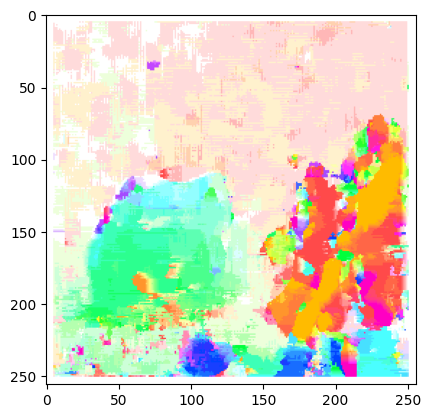

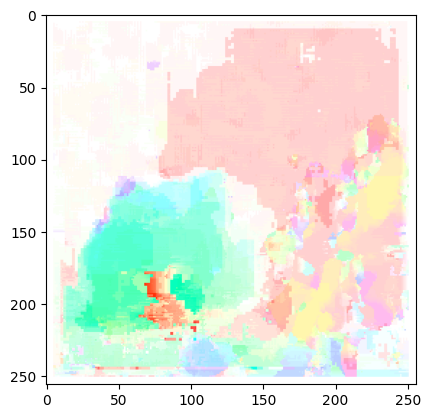

In [124]:
cm1 = read_and_convert('resources/cm1.png')
cm2 = read_and_convert('resources/cm2.png')
u, v = multiscale_of(cm1, cm2, 2, 5, 5, 5)
vis_flow(u, v, cm1.shape)

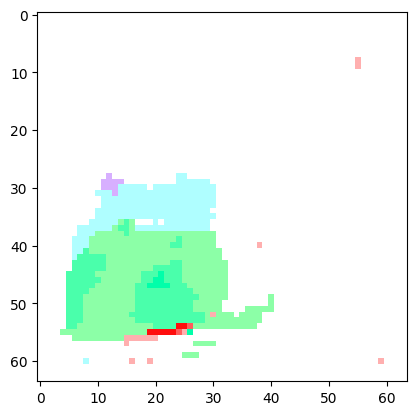

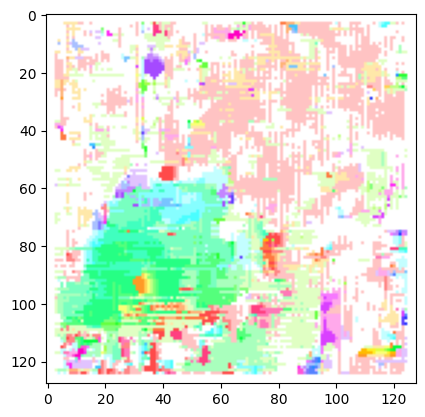

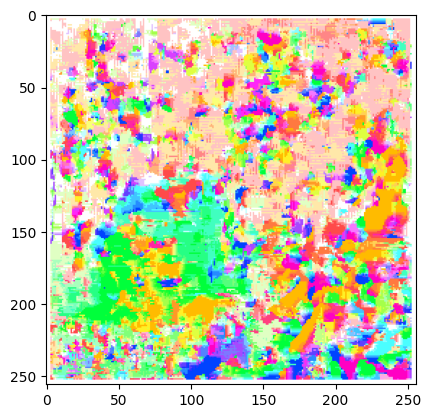

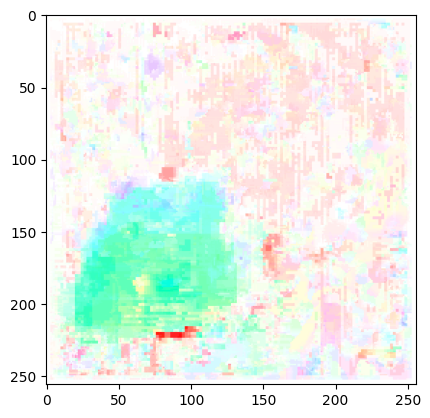

In [125]:
cm1 = read_and_convert('resources/cm1.png')
cm2 = read_and_convert('resources/cm2.png')
u, v = multiscale_of(cm1, cm2, 3, 3, 3, 3)
vis_flow(u, v, cm1.shape)